# Deep Learning in 45 minutes

In this notebook, we use keras that is a deep learning tool for Python. <br>
- Repository: https://github.com/fchollet/keras <br> 
- Documentation: https://keras.io/ <br>

Keras is a high level API of TensofFlow (and Theano, CNTK); we can easily create our deep learning models.

Outline:

- **1. Prepare dataset**
- **2. Create the simplest Neural Network model**
- **3. Create a Convolutional Neural Network model**
- **4. Build your own model**

## 1. Prepare dataset

Keras has several dataset modules: https://keras.io/datasets/ .

Here we use MNIST ( http://yann.lecun.com/exdb/mnist/ ) that is the handwritten digit dataset. 

MNIST, CIFAR10 (CIFAR100) ( https://www.cs.toronto.edu/~kriz/cifar.html ) and ImageNet ( http://www.image-net.org/ ) are very popular dataset for image classifications; many researchers use the same dataset so that they can compare different models in the same experimental environment.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


### Load data onto the memory and do some preprocessing.

Because MNIST data is not so large, it can be loaded onto the memory.

We need some data preprocessing to construct a model efficiently.

- Rescaling <br>
  Original image has [0,255] pixel value. <br>
  Recaling changes its range to [0,1]. <br>
  Recaling is just a scaling operation, but it is often important in model training. <br>
- 1 of K encoding <br>
  Original label has [0,9] value (1 dimension) which correspoding to the number of images. <br>
  1 of K means that we replace the 1-dim label to K-dim vector whose element has 0 or 1. <br>
  e.g., 2 -> [0,0,1,0,0,0,0,0,0,0] (Note that starting index is zero). <br>

Note that we have pre-defined {train, test} data.

In [2]:
# Fixed constants for dataset

DATA_DIM = 784 # 28*28 square image
HEIGHT = 28
WIDTH = 28
CLASS_NUM = 10 # corresponding to the number of digits, from 0 to 9

In [3]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000,DATA_DIM).astype('float32') # 60000 is data size and 784 is data dimension (28*28 monochrome img)
X_test = X_test.reshape(10000,DATA_DIM).astype('float32')

# Rescale data 
X_train /= 255.0
X_test /= 255.0

# Transform label to 1 of K encoding
y_train_org = y_train
y_test_org = y_test
y_train = np_utils.to_categorical(y_train, CLASS_NUM)
y_test = np_utils.to_categorical(y_test, CLASS_NUM)

11157504/11490434 [============================>.] - ETA: 0s

### Check images and  labels of training data.

Check some digit images.

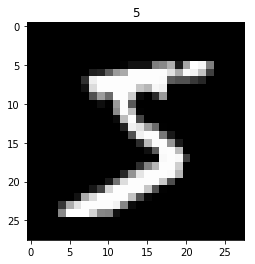

In [4]:
plt.imshow( X_train[0, :].reshape(HEIGHT,WIDTH), cmap='gray' )
plt.title( y_train_org[0] )

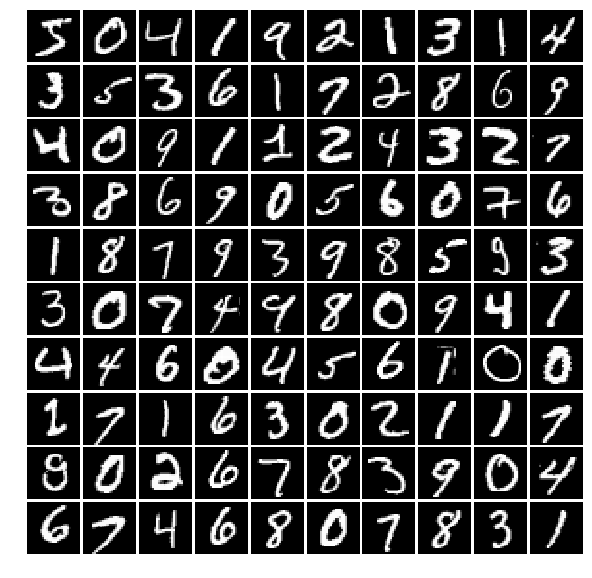

In [5]:
plt.figure(figsize = (10,10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

for i in range(100):
    ax = plt.subplot(gs[i])
    plt.imshow( X_train[i, :].reshape(HEIGHT,WIDTH), cmap='gray' ) # plot
    plt.axis('off')

plt.show()

Check the distribution of labels.

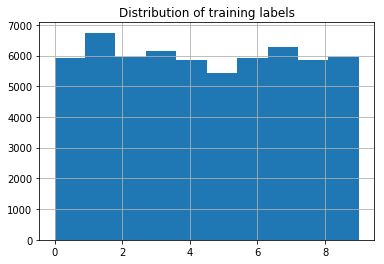

In [6]:
pd.DataFrame(y_train_org).hist()
plt.title("Distribution of training labels")

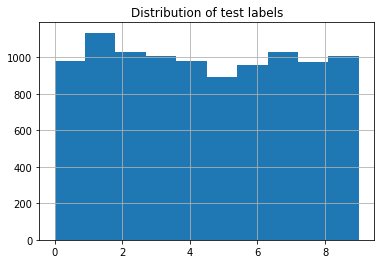

In [7]:
pd.DataFrame(y_test_org).hist()
plt.title("Distribution of test labels")

## 2. Create the simplest Neural Network model

### Create a model.

Creating model in keras is quite simple; here we use the Sequential model.

The Sequential model is a linear stack of layers. <br>
In order to create a model, we need to create at least input and output.

To create a model, all we need to do is stack layers that have functions of each neural network component.

- Dense <br>
  Weights that connect all nodes of l layer and (l+1) layer. <br>
- Activation <br>
  Some non-linear function that is applied to the outputs of nodes. <br>

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [9]:
model = Sequential() # Instantiation
model.add(Dense(units=64, input_dim=DATA_DIM, use_bias=True)) # Add one Dense (Fully-Connected) layer with 64 nodes
model.add(Activation("relu")) # Apply activation fucntion
model.add(Dense(units=CLASS_NUM, use_bias=True)) # Add one Dense (Fully-Connected) layer with 10 nodes
model.add(Activation("softmax")) # Apply softmas which gives probabilities [0,1] for each class

### Compile the model.

We set loss fucntion, optimizer, metric.

- loss function <br>
  Loss function is a function which estimates the BADNESS of model predictions by comparing predictions and answers. <br>
  During model trainings, we try to minimize this loss function. <br>
- optimizer <br>
  The base learning algorithm of neural network is back propagation; however, the learning efficiency is very depending on the choice of optimization method. <br>
  Here we use the most simple optimizer, Stochastic Gradient Descent ( http://leon.bottou.org/publications/pdf/compstat-2010.pdf ). <br>
- metric <br>
  Metric is an estimation function of the model perfomance. <br>
  This is not so different from loss functions, but metrics are tend to be chosen as human-understandable measure, such as accuracy. <br>

In [10]:
from keras.optimizers import SGD

model.compile(
    loss="categorical_crossentropy" # categorical cross entropy is basic loss function for classification problems
    , optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True)
    , metrics=["accuracy"]
)

### Execute model training.

We can use fit method to train a model.

In [11]:
from keras.callbacks import ModelCheckpoint

check = ModelCheckpoint("./trained_models/model_MLP.hdf5")

history = model.fit(
    X_train, y_train
    , epochs=10 # epoch is how many times we repeat the training cycle; epoch 1 means we use all training data once
    , validation_split=0.2 # pick up 20% of training data to check the generalization error
    , batch_size=32 # for each batch size, the weight is updated (mini-batch SGD). The weight is updated (batch_size) / (training data size) for each epoch
    , callbacks=[check]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s - loss: 0.3602 - acc: 0.8964 - val_loss: 0.2263 - val_acc: 0.9353
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.1884 - acc: 0.9456 - val_loss: 0.1590 - val_acc: 0.9546
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.1401 - acc: 0.9604 - val_loss: 0.1340 - val_acc: 0.9622
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.1111 - acc: 0.9683 - val_loss: 0.1198 - val_acc: 0.9643
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.0933 - acc: 0.9729 - val_loss: 0.1200 - val_acc: 0.9668
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.0791 - acc: 0.9770 - val_loss: 0.1034 - val_acc: 0.9690
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0694 - acc: 0.9803 - val_loss: 0.1014 - val_acc: 0.9702
Epoch 8/10
48000/48000 [==============================] - 2s 

### Evaluate the model.

Here we use evaluate method to compute the loss function and metric.

In [12]:
loss_and_metrics = model.evaluate(X_test,y_test)

print( "\n\nvalue of loss fucntion: {}".format(loss_and_metrics[0]) )
print( "value of metric (accuracy): {}".format(loss_and_metrics[1]) )

 8032/10000 [=======================>......] - ETA: 0s

value of loss fucntion: 0.08734496742906049
value of metric (accuracy): 0.9726


Plot the history of training.

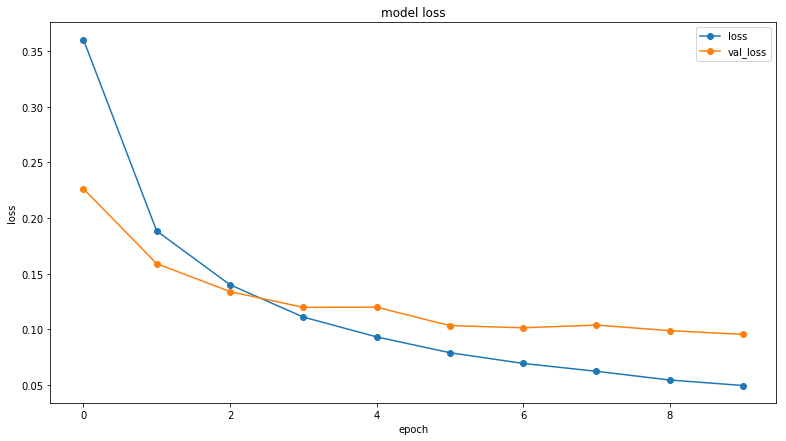

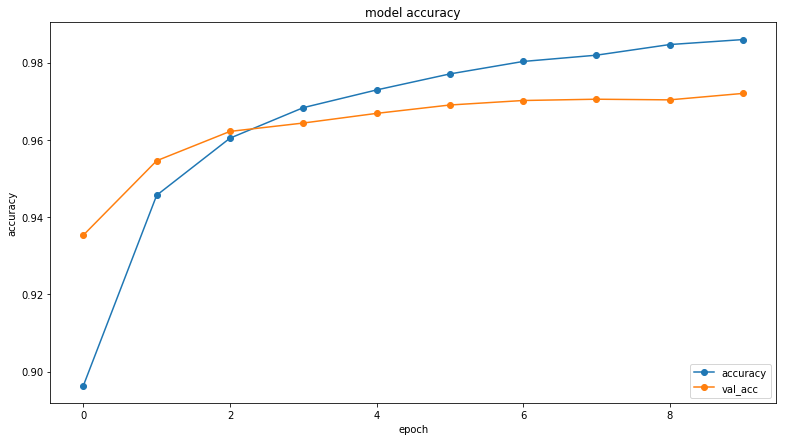

In [13]:
def plot_history(history):
    # plot of loss function
    plt.figure(figsize=(13,7))
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

    # plot of accuracy
    plt.figure(figsize=(13,7))
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

plot_history(history)

Draw the confusion matrix that describes predition - answer relation.

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
def draw_cofusion_matrix(result):
    '''
    input : prediction result as a DF and category dictionary
    output : plot of confusion matrix
    '''
    #Compute confusion matrix
    conf_arr = confusion_matrix(result['answer'],result['prediction'])
    
    #Compute normalized confusion matrix for coloring
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)
    
    #Draw figure
    plt.rcParams["font.size"] = 16
    fig = plt.figure()
    plt.clf()
    fig.set_size_inches(20, 10, forward=True)
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, interpolation='nearest')
    
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))

    width, height = conf_arr.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [16]:
result = pd.DataFrame({
    'prediction' : [ np.argmax(elem) for elem in model.predict(X_train) ]
    , 'answer' : y_train_org
})

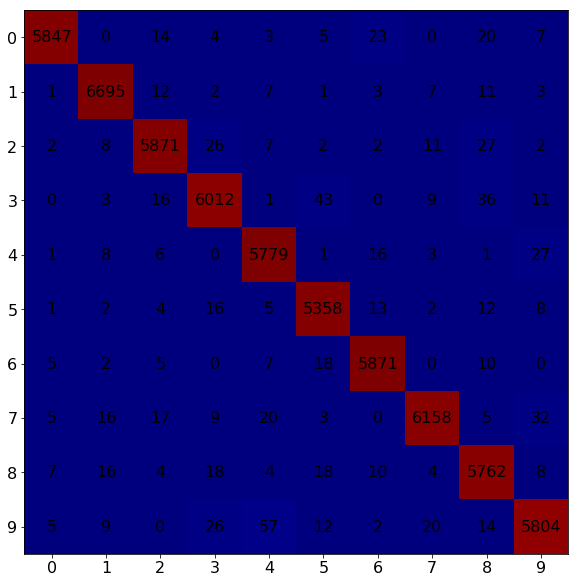

In [17]:
draw_cofusion_matrix(result)

### Visualize the model architecture.


NOTE that this visualization shows each neural network component that is different from the depth of the model we usually use. When referring the depth of the model, we often count the number of {Dense, Convolution} layers. (this is not the strict rule) 

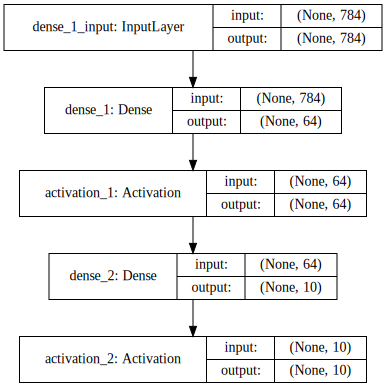

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG( model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg') )

None is the dimension for batch_size; this has different values for each training so the figure says None.

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Check wrong predictions of the model.

Pick up wrong predictions and draw them. <br>
i-th row means the prediction of the model is digit i.

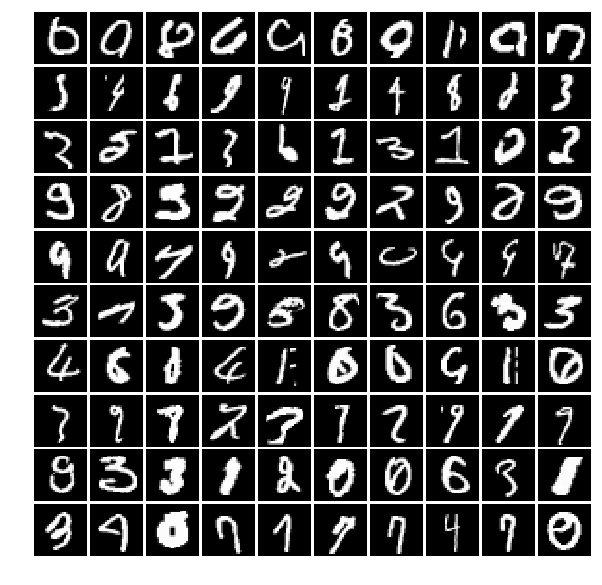

In [20]:
plt.figure(figsize = (10,10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

for digit in range(10):
    wrong_answers_list = list( result[ (result['prediction'] == digit) & (result['answer'] != digit) ].index )
    num = min([10,len(wrong_answers_list)])
    for i in range(num):
        ax = plt.subplot(gs[digit,i])
        plt.imshow( X_train[wrong_answers_list[i], :].reshape(HEIGHT,WIDTH), cmap='gray' ) # plot
        plt.axis('off')

plt.show()

## 3. Construct a Convolutional Neural Network model

First of all, we delete the previous model because the graph structure is stored as defalt graph.

In [21]:
from keras import backend as K
from tensorflow import reset_default_graph

In [22]:
del model
reset_default_graph()
K.clear_session()

### Re-processing of data.

In order to treat convolution layer properly, we need to denote the channel dimension explicitly.

We treat the image data as 4d array: (data num, height, width, channel).

In [23]:
K.image_data_format()

'channels_last'

In [24]:
X_train = X_train.reshape(X_train.shape[0], HEIGHT, WIDTH, 1)
X_test = X_test.reshape(X_test.shape[0], HEIGHT, WIDTH, 1)

### Build a CNN model.

To build a CNN model, we need additional layers: https://keras.io/layers/convolutional/ .

- Conv2d <br>
  Convolution which executes convolution which extracts features for a given area. <br>
- MaxPooling <br>
  MaxPooling which executes max pooling which takes the max value within a given area. <br>
- Flatten <br>
  Flatten is reshape data from (batch, height, weight, chanel) to (batch, flatten vectors) <br>

In [25]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(HEIGHT,WIDTH,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASS_NUM, activation='softmax'))

Let's use Adam ( https://arxiv.org/abs/1412.6980 ) as an optimizer; this is an almost defact standard of the choice of optimizers.

In [27]:
from keras.optimizers import Adam

In [28]:
model.compile(
    loss="categorical_crossentropy"
    , optimizer=Adam()
    , metrics=['accuracy']
)

In [29]:
%%time

check = ModelCheckpoint("./trained_models/model_CNN.hdf5")

history = model.fit(
    X_train, y_train
    , epochs=5 # epoch is how many times we repeat the training cycle; epoch 1 means we use all training data once
    , validation_split=0.2 # pick up 20% of training data to check the generalization error
    , batch_size=32 # for each batch size, the weight is updated (mini-batch SGD). The weight is updated (batch_size) / (training data size) for each epoch
    , callbacks=[check]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 131s - loss: 0.2059 - acc: 0.9372 - val_loss: 0.0633 - val_acc: 0.9830
Epoch 2/5
48000/48000 [==============================] - 137s - loss: 0.0856 - acc: 0.9742 - val_loss: 0.0440 - val_acc: 0.9880
Epoch 3/5
48000/48000 [==============================] - 142s - loss: 0.0627 - acc: 0.9809 - val_loss: 0.0445 - val_acc: 0.9872
Epoch 4/5
48000/48000 [==============================] - 137s - loss: 0.0538 - acc: 0.9833 - val_loss: 0.0397 - val_acc: 0.9888
Epoch 5/5
48000/48000 [==============================] - 138s - loss: 0.0447 - acc: 0.9859 - val_loss: 0.0401 - val_acc: 0.9894
CPU times: user 29min 6s, sys: 7min 39s, total: 36min 45s
Wall time: 11min 26s


### Evaluate the model.

In [30]:
loss_and_metrics = model.evaluate(X_test,y_test)

print( "\n\nvalue of loss fucntion: {}".format(loss_and_metrics[0]) )
print( "value of metric (accuracy): {}".format(loss_and_metrics[1]) )

 9952/10000 [============================>.] - ETA: 0s

value of loss fucntion: 0.030156995998243657
value of metric (accuracy): 0.99


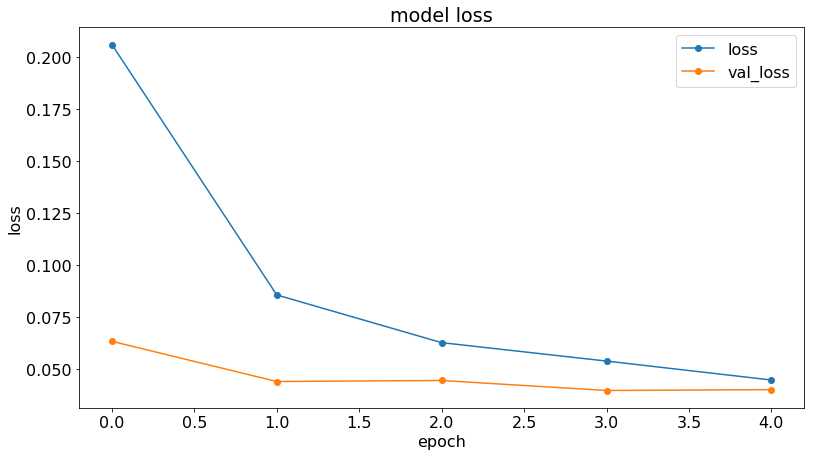

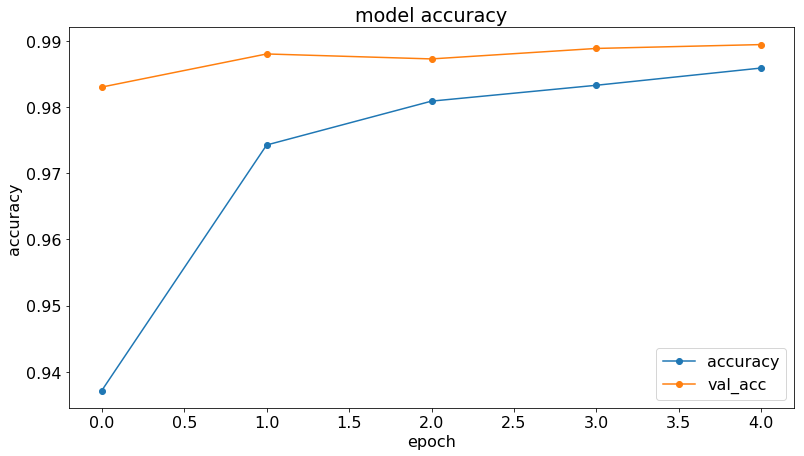

In [31]:
plot_history(history)

In [32]:
%%time

result = pd.DataFrame({
    'prediction' : [ np.argmax(elem) for elem in model.predict(X_train) ]
    , 'answer' : y_train_org
})

CPU times: user 1min 53s, sys: 24.6 s, total: 2min 17s
Wall time: 44.6 s


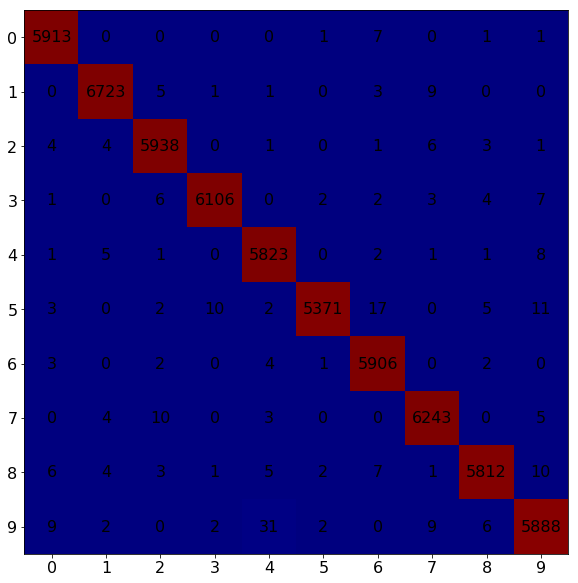

In [33]:
draw_cofusion_matrix(result)

### Visualize the model architecture.

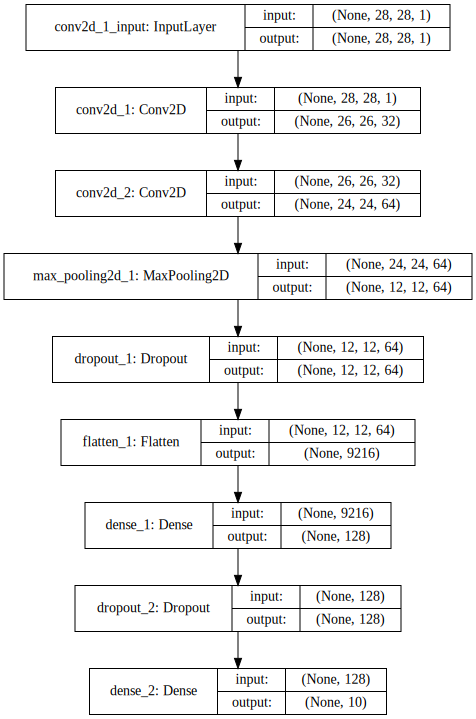

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG( model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg') )

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## 4. Build your own model

Let's create your original model!!!

In [ ]:
del model
reset_default_graph()
K.clear_session()

In [ ]:
model = Sequential()
########################
######## BUILD YOUR OWN MODEL!
########################
model.add(Dense(CLASS_NUM, activation='softmax'))

In [ ]:
model.compile(
    loss="categorical_crossentropy"
    , optimizer=Adam()
    , metrics=['accuracy']
)

In [ ]:
check = ModelCheckpoint("./trained_models/my_model_CNN.hdf5")

history = model.fit(
    X_train, y_train
    , epochs=5 # epoch is how many times we repeat the training cycle; epoch 1 means we use all training data once
    , validation_split=0.2 # pick up 20% of training data to check the generalization error
    , batch_size=32 # for each batch size, the weight is updated (mini-batch SGD). The weight is updated (batch_size) / (training data size) for each epoch
    , callbacks=[check]
)

In [ ]:
loss_and_metrics = model.evaluate(X_test,y_test)

print( "\n\nvalue of loss fucntion: {}".format(loss_and_metrics[0]) )
print( "value of metric (accuracy): {}".format(loss_and_metrics[1]) )

## Questions

1. Can you derive the mathematical formula for updating weights with backpropagation?
- Can you explain the special case where the backpropagation formula can be unified simple form? <br>
 HINT: canonical link
- Can you implement the back propagation algorithm from scratch?
- Can you explain concrete mathematical operations of convolution and pooling?
- Can you check and find the differences among Conv1D, Conv2D and Conv3D which are implemented in Keras? <br>
 https://github.com/fchollet/keras/blob/master/keras/layers/convolutional.py
- Can you explain various activation functions?
- Can you explain various optimization algorithms?
- Can you explain what model methods (like model.compile, model.fit, ...) actually do in Keras? <br>
 https://github.com/fchollet/keras/blob/master/keras/models.py
- Can you explain how to count the total number of parameters of CNN?
- Can you compare the result of MNIST classification using an another model with that of this notebook? <br>
 In fact MNIST classification is easy to be solved well without deep learning.
- Can you compare the result of tensorflow backend case with that of theano case?